# Multi-class Classification using Keras

Keras is a deep learning Library working on top of numerical libraries like tensorflow or Theano. 

In this tutorial you will learn about classification of flowers using keras on Iris Dataset.

After Completing this tutorial youi will learn:

1) Load data from CSV and make it available to Keras.

2) To prepare multi-class classification data for modeling with neural networks.

3) Evaluate Keras neural network models with scikit-learn.

# 1. Dataset

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

Link: http://archive.ics.uci.edu/ml/datasets/Iris

Iris Data Set is famous dataset in the world of pattern recognition and it is considered to be “Hello World” example for machine learning classification problems. It was first introduced by Ronald Fisher, British statistician and botanist, back in 1936. In his paper The use of multiple measurements in taxonomic problems, he used data collected for three different classes of Iris plant: Iris setosa, Iris virginica, and Iris versicolor.

This dataset contains 50 instances for each class. What is interesting about it is that first class is linearly separable from the other two, but the latter two are not linearly separable from each other. Each instance has five attributes:

__Sepal length in cm__

__Sepal width in cm__

__Petal length in cm__

__Petal width in cm__

__Class (Iris setosa, Iris virginica, Iris versicolor)__



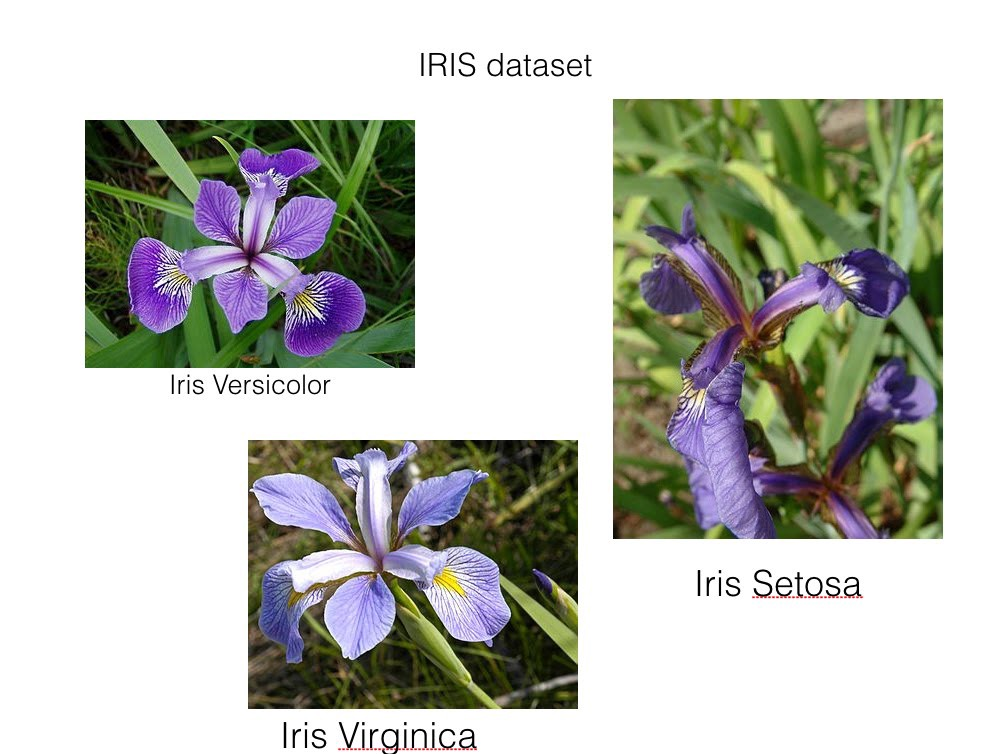

# 2. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.


# 3. Importing Dataset

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

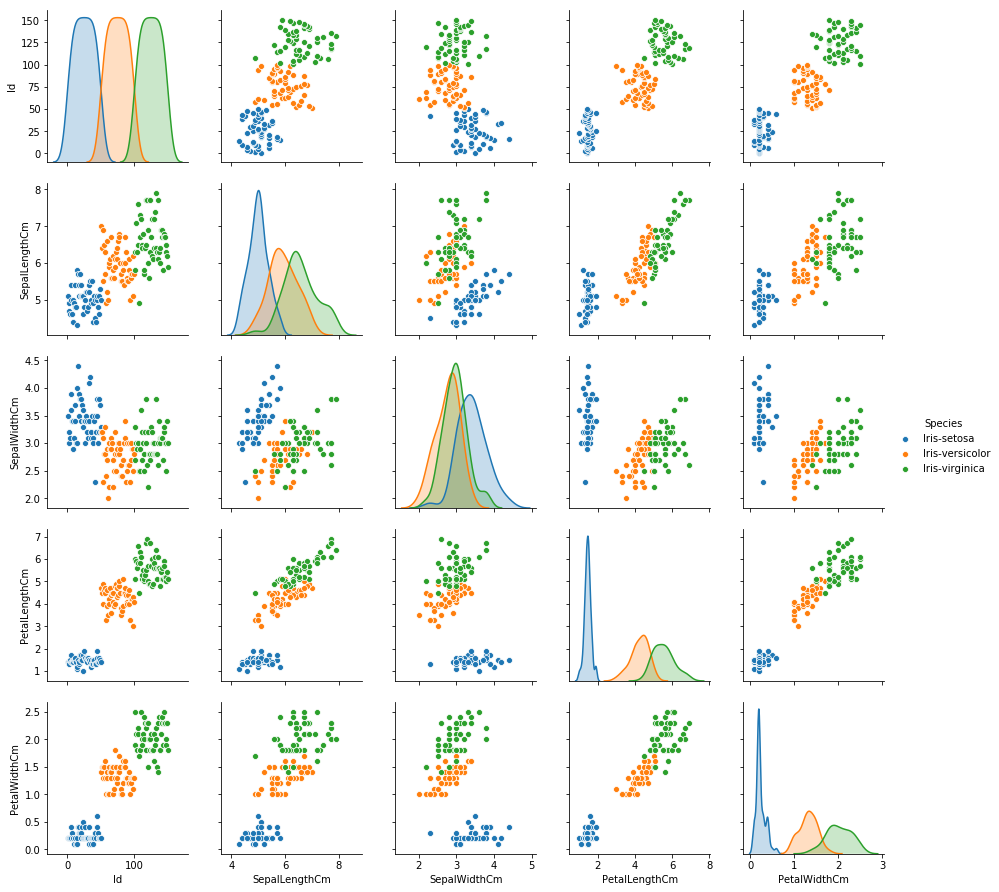

In [4]:
import seaborn as sns
sns.pairplot(df, hue='Species')

In [5]:
#Removing Column ID because it's obsolete
df1=df.drop("Id",axis=1)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Making x and y
x = df1.iloc[:,0:4]
y = df1.iloc[:,4]

# 4. Splitting x and y as test and train

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.5,random_state=1)

# 5.Encoding

The output variable contains three different string values. When modeling multi-class classification problems using neural networks, it is good practice to reshape the output attribute from a vector that contains values for each class value to be a matrix with a boolean for each class value and whether or not a given instance has that class value or not.

If we take a look at our expected output values, we can notice that we have three values: 0, 1 and 2.

Value 0 is used to represent Iris setosa, 

Value 1 to represent Iris versicolor and 

Value 2 to represent virginica. 

The good news about these values is that we didn’t get string values in the dataset. If you end up in that situation, you would need to use some kind of encoder so you can format data to something similar as we have in our current dataset. For this purpose, one can use __LabelEncoder__ of sklearn library. Bad news about these values in the dataset is that they are not applicable to __Sequential model__. 

What we want to do is reshape the expected output from a vector that contains values for each class value to a matrix with a boolean for each class value. 

This is called __one-hot encoding__. In order to achieve this, we will use np_utils from the Keras library

In [8]:
# keras needs inputs to be vectors , so one hot encoding values
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))
y_train_ohe=one_hot_encode_object_array(y_train)
y_test_ohe=one_hot_encode_object_array(y_test)

# 6.Create Model

One of the major points for using Keras is that it is one user-friendly API. It has two types of models:

__Sequential model__

Model class used with functional API

Sequential model is probably the most used feature of Keras. Essentially it represents the array of Keras Layers. It is convenient for the fast building of different types of Neural Networks, by adding layers to it.

There are many types of Keras Layers. The most basic one and the one we are going to use in this article is called Dense. It has many options for setting the inputs, activation functions and so on. 

Apart from Dense, rich Keras API provides different types of layers for Convolutional Neural Networks, Recurrent Neural Networks, etc. This is out of the scope of this post, but we. So, let’s see how one can build a Neural Network using Sequential and Dense.

In [9]:
# Creating a model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In this sample, we first imported the Sequential and Dense from Keras. Than we instantiated one object of the Sequential class.

After that, we added one layer to the Neural Network using function add and Dense class. The first parameter in the Dense constructor is used to define a number of neurons in that layer. What is specific about this layer is that we used input_dim parameter. By doing so, we added additional input layer to our network with the number of neurons defined in input_dim parameter. Basically, by this one call, we added two layers. 

Another important parameter, as you may notice, is activation parameter. Using this parameter we define activation function for all neurons in a specific layer. Here we used ‘relu’ value, which indicates that neurons in this layer will use Rectifier activation function. 

This time we are creating:

one input layer with four nodes, because we are having four attributes in our input values

two hidden layers with ten neurons each

one output layer with three neurons, because we are having three output classes

In hidden layers, neurons use Rectifier activation function, while in output layer neurons use Softmax activation function (ensuring that output values are in the range of 0 and 1). After that, we compile our model, where we define our cost function and optimizer. In this instance, we will use Adam gradient descent optimization algorithm with a logarithmic cost function (called categorical_crossentropy in Keras).

# 7.Train the Network

In [10]:
model.fit(X_train,y_train_ohe,nb_epoch=100,batch_size=1,verbose=1)

#Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test_ohe, verbose=1)
print("Accuracy = {:.2f}".format(accuracy))

C:\Users\Roshan\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
75/75 [==============================] - 0s 4ms/step - loss: 1.1349 - acc: 0.2667
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 0.8919 - acc: 0.4667
Epoch 3/100
75/75 [==============================] - 0s 1ms/step - loss: 0.8220 - acc: 0.7200
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 0.7634 - acc: 0.7067
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 0.7011 - acc: 0.7733
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6478 - acc: 0.8667
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 0.5770 - acc: 0.9067
Epoch 8/100
75/75 [==============================] - 0s 1ms/step - loss: 0.5258 - acc: 0.8933
Epoch 9/100
75/75 [==============================] - 0s 1ms/step - loss: 0.4737 - acc: 0.8533
Epoch 10/100
75/75 [==============================] - 0s 1ms/step - loss: 0.4224 - acc: 0.9467
Epoch 11/100
75/75 [==============================] - 0s 1m

75/75 [==============================] - 0s 1ms/step - loss: 0.0803 - acc: 0.9733
Epoch 88/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0945 - acc: 0.9867
Epoch 89/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0895 - acc: 0.9600
Epoch 90/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0937 - acc: 0.9600
Epoch 91/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0935 - acc: 0.9600
Epoch 92/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0875 - acc: 0.9733
Epoch 93/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0907 - acc: 0.9733
Epoch 94/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0971 - acc: 0.9333
Epoch 95/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0963 - acc: 0.9467
Epoch 96/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0922 - acc: 0.9733
Epoch 97/100
75/75 [==============================] - 0s 1ms/st

# Conclusion

In this post you discovered how to develop and evaluate a neural network using the Keras Python library for deep learning.

By completing this tutorial, you learned:

1) How to load data and make it available to Keras.

2) How to prepare multi-class classification data for modeling using one hot encoding.

3) How to use Keras neural network models with scikit-learn.

4) How to define a neural network using Keras for multi-class classification.

5) How to evaluate a Keras neural network model.